# Output Remaining Prediction

Import some basic libraries.

In [53]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data
import numpy as np
from sklearn.preprocessing import Imputer

%matplotlib inline

# Loading and Reviewing the Data

In [54]:
#df = pd.read_csv("trainingData1_new.txt")
df = pd.read_csv("trainingData1_new.txt", nrows=100000)

In [55]:
df.shape

(100000, 17)

In [56]:
df.head(70)

,Unnamed: 0,date,stock,binNum,binStartTime,binEndTime,auctionIndicator,volume,binStartPrice,binEndPrice,day_openPrice,day_closePrice,day_lowPrice,day_highPrice,output_remainingVolume,output_closeAuctionVolume,output_closePriceDirection
0,0,d0,stock0,1,09:00:00.000,09:30:00.000,OpenAuction,5500.0,99.54853,99.54853,99.54853,100.10670,99.54853,100.4618,2816000.0,439500.0,1
1,1,d0,stock0,2,09:30:00.000,09:35:00.000,NaN,161500.0,99.54853,100.36030,99.54853,100.10670,99.54853,100.4618,2810500.0,439500.0,1
2,2,d0,stock0,3,09:35:00.000,09:40:00.000,NaN,72500.0,100.36030,100.41110,99.54853,100.10670,99.54853,100.4618,2649000.0,439500.0,1
3,3,d0,stock0,4,09:40:00.000,09:45:00.000,NaN,34500.0,100.30960,100.25890,99.54853,100.10670,99.54853,100.4618,2576500.0,439500.0,1
4,4,d0,stock0,5,09:45:00.000,09:50:00.000,NaN,29500.0,100.25890,100.30960,99.54853,100.10670,99.54853,100.4618,2542000.0,439500.0,1
5,5,d0,stock0,6,09:50:00.000,09:55:00.000,NaN,16000.0,100.25890,100.25890,99.54853,100.10670,99.54853,100.4618,2512500.0,439500.0,1
6,6,d0,stock0,7,09:55:00.000,10:00:00.000,NaN,1000.0,100.05590,100.10670,99.54853,100.10670,99.54853,100.4618,2496500.0,439500.0,1
7,7,d0,stock0,8,10:00:00.000,10:05:00.000,NaN,45000.0,100.10670,100.25890,99.54853,100.10670,99.54853,100.4618,2495500.0,439500.0,1
8,8,d0,stock0,9,10:05:00.000,10:10:00.000,NaN,27500.0,100.20810,100.25890,99.54853,100.10670,99.54853,100.4618,2450500.0,439500.0,1
9,9,d0,stock0,10,10:10:00.000,10:15:00.000,NaN,98500.0,100.25890,100.10670,99.54853,100.10670,99.54853,100.4618,2423000.0,439500.0,1


In [57]:
df=df[df.auctionIndicator != 'CloseAuction']

# Check for null values

In [58]:
df.head(70)

,Unnamed: 0,date,stock,binNum,binStartTime,binEndTime,auctionIndicator,volume,binStartPrice,binEndPrice,day_openPrice,day_closePrice,day_lowPrice,day_highPrice,output_remainingVolume,output_closeAuctionVolume,output_closePriceDirection
0,0,d0,stock0,1,09:00:00.000,09:30:00.000,OpenAuction,5500.0,99.54853,99.54853,99.54853,100.10670,99.54853,100.4618,2816000.0,439500.0,1
1,1,d0,stock0,2,09:30:00.000,09:35:00.000,NaN,161500.0,99.54853,100.36030,99.54853,100.10670,99.54853,100.4618,2810500.0,439500.0,1
2,2,d0,stock0,3,09:35:00.000,09:40:00.000,NaN,72500.0,100.36030,100.41110,99.54853,100.10670,99.54853,100.4618,2649000.0,439500.0,1
3,3,d0,stock0,4,09:40:00.000,09:45:00.000,NaN,34500.0,100.30960,100.25890,99.54853,100.10670,99.54853,100.4618,2576500.0,439500.0,1
4,4,d0,stock0,5,09:45:00.000,09:50:00.000,NaN,29500.0,100.25890,100.30960,99.54853,100.10670,99.54853,100.4618,2542000.0,439500.0,1
5,5,d0,stock0,6,09:50:00.000,09:55:00.000,NaN,16000.0,100.25890,100.25890,99.54853,100.10670,99.54853,100.4618,2512500.0,439500.0,1
6,6,d0,stock0,7,09:55:00.000,10:00:00.000,NaN,1000.0,100.05590,100.10670,99.54853,100.10670,99.54853,100.4618,2496500.0,439500.0,1
7,7,d0,stock0,8,10:00:00.000,10:05:00.000,NaN,45000.0,100.10670,100.25890,99.54853,100.10670,99.54853,100.4618,2495500.0,439500.0,1
8,8,d0,stock0,9,10:05:00.000,10:10:00.000,NaN,27500.0,100.20810,100.25890,99.54853,100.10670,99.54853,100.4618,2450500.0,439500.0,1
9,9,d0,stock0,10,10:10:00.000,10:15:00.000,NaN,98500.0,100.25890,100.10670,99.54853,100.10670,99.54853,100.4618,2423000.0,439500.0,1


In [59]:
df.isnull().values.any()

True

# Correlated Feature Check

Helper function that displays correlation by color. Red is most correlated, Blue least.

In [60]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

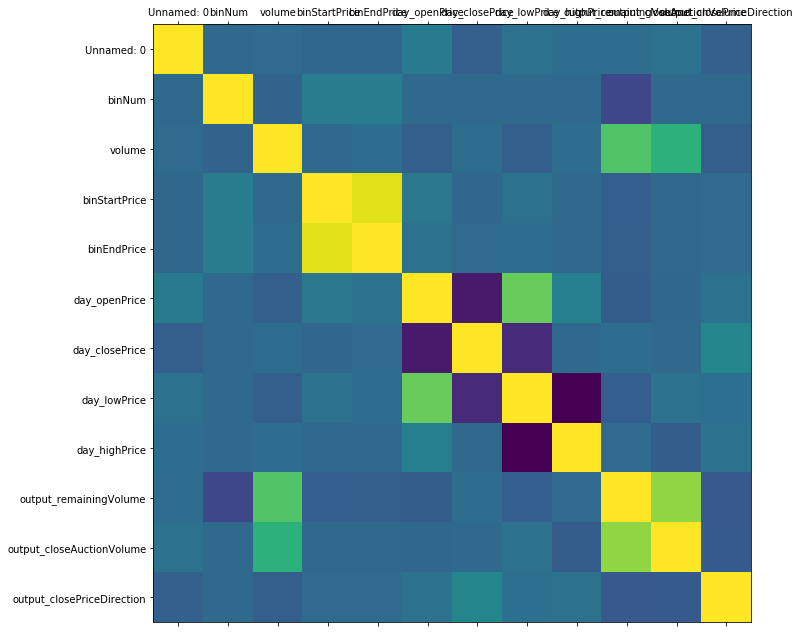

In [61]:
plot_corr(df)

In [62]:
df.corr()

,Unnamed: 0,binNum,volume,binStartPrice,binEndPrice,day_openPrice,day_closePrice,day_lowPrice,day_highPrice,output_remainingVolume,output_closeAuctionVolume,output_closePriceDirection
Unnamed: 0,1.000000,0.001736,0.008881,-0.015460,-0.019065,0.098467,-0.064190,0.046125,0.024022,0.022085,0.041616,-0.056569
binNum,0.001736,1.000000,-0.037434,0.117007,0.113842,-0.000429,0.000223,-0.000042,-0.000286,-0.194305,0.000011,0.000393
volume,0.008881,-0.037434,1.000000,-0.000772,0.023589,-0.062776,0.012212,-0.063605,0.019225,0.585458,0.456528,-0.065100
binStartPrice,-0.015460,0.117007,-0.000772,1.000000,0.928611,0.081741,-0.023341,0.044882,0.002810,-0.068198,0.001056,0.010198
binEndPrice,-0.019065,0.113842,0.023589,0.928611,1.000000,0.042957,0.005184,0.017224,-0.001753,-0.061958,0.001377,0.007195
day_openPrice,0.098467,-0.000429,-0.062776,0.081741,0.042957,1.000000,-0.415177,0.647294,0.134687,-0.076945,-0.016133,0.047242
day_closePrice,-0.064190,0.000223,0.012212,-0.023341,0.005184,-0.415177,1.000000,-0.346918,-0.005060,0.027626,-0.000100,0.173429
day_lowPrice,0.046125,-0.000042,-0.063605,0.044882,0.017224,0.647294,-0.346918,1.000000,-0.526098,-0.067627,0.040828,0.032031
day_highPrice,0.024022,-0.000286,0.019225,0.002810,-0.001753,0.134687,-0.005060,-0.526098,1.000000,0.007108,-0.073597,0.040755
output_remainingVolume,0.022085,-0.194305,0.585458,-0.068198,-0.061958,-0.076945,0.027626,-0.067627,0.007108,1.000000,0.748030,-0.099153


In [63]:
auction_indicator_map = {'OpenAuction':1,'CloseAuction':2,np.NaN:3}
df['auctionIndicator'] = df['auctionIndicator'].map(auction_indicator_map)

In [64]:
df.head(5)

,Unnamed: 0,date,stock,binNum,binStartTime,binEndTime,auctionIndicator,volume,binStartPrice,binEndPrice,day_openPrice,day_closePrice,day_lowPrice,day_highPrice,output_remainingVolume,output_closeAuctionVolume,output_closePriceDirection
0,0,d0,stock0,1,09:00:00.000,09:30:00.000,1,5500.0,99.54853,99.54853,99.54853,100.1067,99.54853,100.4618,2816000.0,439500.0,1
1,1,d0,stock0,2,09:30:00.000,09:35:00.000,3,161500.0,99.54853,100.36030,99.54853,100.1067,99.54853,100.4618,2810500.0,439500.0,1
2,2,d0,stock0,3,09:35:00.000,09:40:00.000,3,72500.0,100.36030,100.41110,99.54853,100.1067,99.54853,100.4618,2649000.0,439500.0,1
3,3,d0,stock0,4,09:40:00.000,09:45:00.000,3,34500.0,100.30960,100.25890,99.54853,100.1067,99.54853,100.4618,2576500.0,439500.0,1
4,4,d0,stock0,5,09:45:00.000,09:50:00.000,3,29500.0,100.25890,100.30960,99.54853,100.1067,99.54853,100.4618,2542000.0,439500.0,1


In [65]:
df.fillna(method='ffill',inplace=True)
df['date'] = df['date'].str.replace('d','',case = False)
df['stock'] = df['stock'].str.replace('stock','',case = False)
df.isnull().values.any()

False

In [66]:
#df['volume'] = np.log(df['volume'])

In [67]:
df.head(5)

,Unnamed: 0,date,stock,binNum,binStartTime,binEndTime,auctionIndicator,volume,binStartPrice,binEndPrice,day_openPrice,day_closePrice,day_lowPrice,day_highPrice,output_remainingVolume,output_closeAuctionVolume,output_closePriceDirection
0,0,0,0,1,09:00:00.000,09:30:00.000,1,5500.0,99.54853,99.54853,99.54853,100.1067,99.54853,100.4618,2816000.0,439500.0,1
1,1,0,0,2,09:30:00.000,09:35:00.000,3,161500.0,99.54853,100.36030,99.54853,100.1067,99.54853,100.4618,2810500.0,439500.0,1
2,2,0,0,3,09:35:00.000,09:40:00.000,3,72500.0,100.36030,100.41110,99.54853,100.1067,99.54853,100.4618,2649000.0,439500.0,1
3,3,0,0,4,09:40:00.000,09:45:00.000,3,34500.0,100.30960,100.25890,99.54853,100.1067,99.54853,100.4618,2576500.0,439500.0,1
4,4,0,0,5,09:45:00.000,09:50:00.000,3,29500.0,100.25890,100.30960,99.54853,100.1067,99.54853,100.4618,2542000.0,439500.0,1


In [68]:
num_obs = len(df)
num_1 = len(df.loc[df['output_closePriceDirection'] == 1])
num_0 = len(df.loc[df['output_closePriceDirection'] == 0])
num_minus_1 = len(df.loc[df['output_closePriceDirection'] == -1])
print("Number of 1 cases:  {0} ({1:2.2f}%)".format(num_1, (num_1/num_obs) * 100))
print("Number of 0 cases: {0} ({1:2.2f}%)".format(num_0, (num_0/num_obs) * 100))
print("Number of -1 cases: {0} ({1:2.2f}%)".format(num_minus_1, (num_minus_1/num_obs) * 100))

Number of 1 cases:  40736 (41.34%)
Number of 0 cases: 30485 (30.94%)
Number of -1 cases: 27309 (27.72%)


In [69]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['volume','binStartPrice','binEndPrice']
predicted_class_names = ['output_remainingVolume']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

In [70]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index)) * 100))

70.00% in training set
30.00% in test set


# rows in dataframe 98530


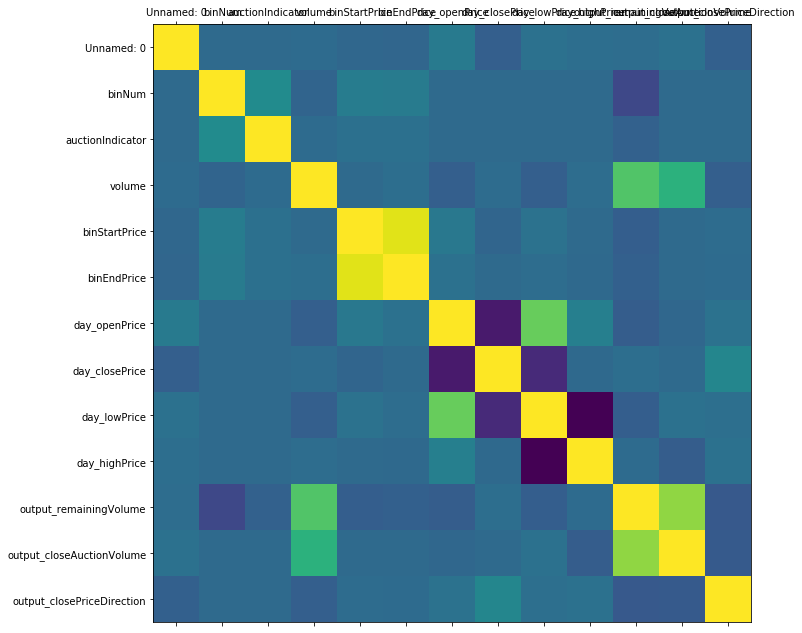

In [71]:
list_of_col = list(df.columns.values)

print("# rows in dataframe {0}".format(len(df)))

# to define plot
def plot_corr(df, size=11):
   corr = df.corr()    # data frame correlation function
   fig, ax = plt.subplots(figsize=(size, size))
   ax.matshow(corr)   # color code the rectangles by correlation value
   plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
   plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks      

plot = plot_corr(df)
cor_data = df.corr()

#x_train = df.loc[:,['date','stock', 'binStartTime','binEndTime', 'volume','binStartPrice','binEndPrice']]
#x_train = df.loc[:,['date','stock', 'volume','binStartPrice','binEndPrice']]
#y_train = df.loc[:,['output_remainingVolume']]

#plot = plot_corr(x_train)

In [72]:
x_train.shape

(68971, 3)

In [73]:
print(x_train[[0, 1, 3, 4, 5], :])

[[5.300000e+05 1.010957e+02 1.010957e+02]
 [3.410000e+05 1.001807e+02 1.001807e+02]
 [5.500000e+04 1.001120e+02 1.000049e+02]
 [3.800000e+04 1.001625e+02 1.001625e+02]
 [4.200000e+04 9.952935e+01 9.912883e+01]]


In [74]:
x_test.shape

(29559, 3)

In [75]:
print(x_test[[0, 1, 3, 4, 5], :])

[[1.800000e+04 9.923545e+01 9.902204e+01]
 [5.400000e+04 1.002297e+02 1.002297e+02]
 [1.580000e+05 9.990890e+01 9.990890e+01]
 [5.400000e+04 1.001739e+02 1.003193e+02]
 [2.700000e+04 9.997927e+01 1.002225e+02]]


In [76]:
#x_train['date'] = x_train['date'].str.replace('d','',case = False)
#x_train['stock'] = x_train['stock'].str.replace('stock','',case = False)
#x_train['binStartTime'] = x_train['binStartTime'].str.replace(':00.000','',case = False)
#x_train['binStartTime'] = x_train['binStartTime'].str.replace(':','',case = False)
#x_train['binEndTime'] = x_train['binEndTime'].str.replace(':00.000','',case = False)
#x_train['binEndTime'] = x_train['binEndTime'].str.replace(':','',case = False)

In [77]:
x_train.head(5)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
y_train.head(5)

In [46]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Linear Regression 

In [78]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
# Predicting the Test set results
lg_pred_train = regressor.predict(x_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
#print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lg_pred_train)))
print("Accuracy: {0:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, lg_pred_train))))
print("Accuracy: {0:.4f}".format(metrics.r2_score(y_test, lg_pred_train)))
print()

Accuracy: 24127838.2658
Accuracy: 0.3482



# Naive Bayes

In [150]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

In [ ]:
# predict values using the training data
nb_predict_train = nb_model.predict(x_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(x_train, y_train.ravel()) 

In [ ]:
rf_predict_train = rf_model.predict(x_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

In [ ]:
rf_predict_test = rf_model.predict(x_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))